Import all the deependencies 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and Pre-processing

In [4]:
# Loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [5]:
# Check number of rows and columns of the dataset
car_dataset.shape

(301, 9)

In [6]:
# first 5 records of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# Check the missing values in the dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Getting some information about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# Checking the distribution of the categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [10]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Data and Label

In [12]:
# X = Independent varable , Y = Target/Dependent variable
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [13]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

Splitting the data into Training data and testing data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state =1) 

In [15]:
print(X.shape, X_test.shape, X_train.shape)

(301, 7) (31, 7) (270, 7)


Model Training

Linear Regression

In [18]:
lin_reg_model = LinearRegression()

In [19]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [20]:
# Prediction on training data
X_train_prediction = lin_reg_model.predict(X_train)

In [26]:
# R square error
error_score = metrics.r2_score(X_train_prediction, Y_train)
print('R square error for train data :', error_score)

R square error for train data : 0.8747087509719506


In [27]:
# Prediction on test data
X_test_prediction = lin_reg_model.predict(X_test)

In [28]:
# R square error
error_score1 = metrics.r2_score(X_test_prediction, Y_test)
print('R square error for test data : ', error_score1)


R square error for test data :  0.6209908213647468


Visualize the actual prices and Predicted prices


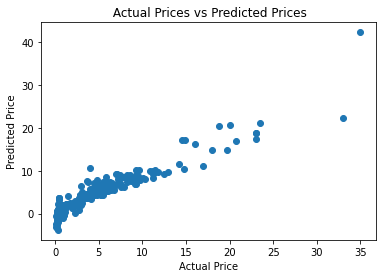

In [30]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso regression

In [33]:
# loading the linear regression model
lass_reg_model = Lasso()

In [36]:
lass_reg_model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model evaluation

In [40]:
# Prediction on training data
X_train_prediction1 = lass_reg_model.predict(X_train)

In [41]:
# R square error
lasso_error_score = metrics.r2_score(X_train_prediction1, Y_train)
print('R square error for training data :', lasso_error_score)

R square error for training data : 0.8152910337698503


Visualize the actual price and Predicted price

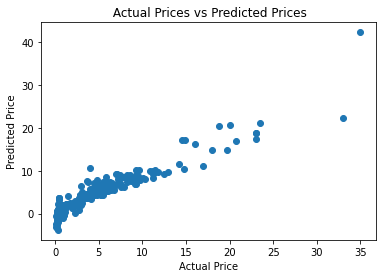

In [43]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [45]:
# prediction on test data
X_test_prediction = lass_reg_model.predict(X_test)

In [48]:
# R-square error
R_square_error = metrics.r2_score(Y_test , X_test_prediction)
print('R suare error for testing data :', R_square_error)

R suare error for testing data : 0.46123204958260644
